In [1]:
from oceannavigator.dataset_config import DatasetConfig
from data import open_dataset
config= DatasetConfig('riops_fc_2dll')
sample_variable = config.variables[0]
with open_dataset(config, variable=sample_variable, timestamp=-1) as dataset:
   lat_var='latitude'
   lon_var='longitude'
   lat_data = dataset.nc_data.dataset.variables[lat_var][:]
   lon_data = dataset.nc_data.dataset.variables[lon_var][:]

/home/ubuntu/onav-cloud/tools/miniconda/3/amd64/envs/navigator/lib/python3.12/site-packages/xarray/backends/plugins.py:80: RuntimeWarning: Engine 'gini' loading failed:
Struct() takes at most 1 argument (3 given)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
import numpy as np;
from shapely.geometry import LinearRing, Point, Polygon;
from shapely.geometry import MultiPoint;

lon_mesh, lat_mesh = np.meshgrid(lon_data, lat_data)
lat_flat = lat_mesh.flatten()
lon_flat = lon_mesh.flatten()
valid_mask = ~(np.isnan(lat_flat) | np.isnan(lon_flat))
lat_valid = lat_flat[valid_mask]
lon_valid = lon_flat[valid_mask]
lon_valid = ((lon_valid + 180) % 360) - 180

# Sample points if too many (for performance)
if len(lat_valid) > 1000:
    indices = np.linspace(0, len(lat_valid)-1, 1000, dtype=int)
    lat_valid = lat_valid[indices]
    lon_valid = lon_valid[indices]

# Create convex hull
points = [(lon, lat) for lon, lat in zip(lon_valid, lat_valid)]
multipoint = MultiPoint(points)
hull = multipoint.convex_hull
coords = list(hull.exterior.coords)


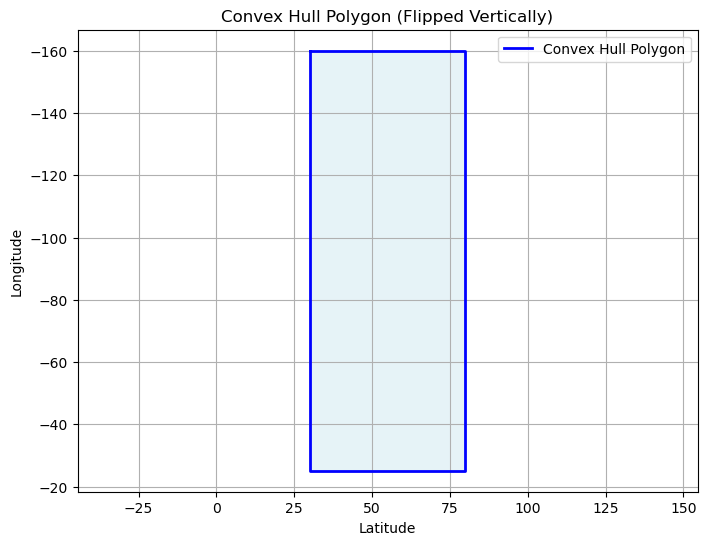

In [7]:
lat_min = float(np.min(lat_data))
lat_max = float(np.max(lat_data))
lon_min = float(np.min(lon_data))
lon_max = float(np.max(lon_data))
coords = [
[lon_min, lat_min],
[lon_max, lat_min],
[lon_max, lat_max],
[lon_min, lat_max],
[lon_min, lat_min],  # close the polygon
]
# Unpack coords into x (lon) and y (lat)
x, y = zip(*coords)  # coords is a list of (lon, lat) tuples

# Plot the polygon (with x=lon, y=lat)
plt.figure(figsize=(8, 6))
plt.plot(y, x, color='blue', linewidth=2, label='Convex Hull Polygon')  # swapped y, x
plt.fill(y, x, color='lightblue', alpha=0.3)  # optional fill

# Formatting
plt.xlabel("Latitude")   # because y is now lat
plt.ylabel("Longitude")  # because x is now lon
plt.title("Convex Hull Polygon (Flipped Vertically)")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.gca().invert_yaxis()  # ⬅️ Flip vertically
plt.show()


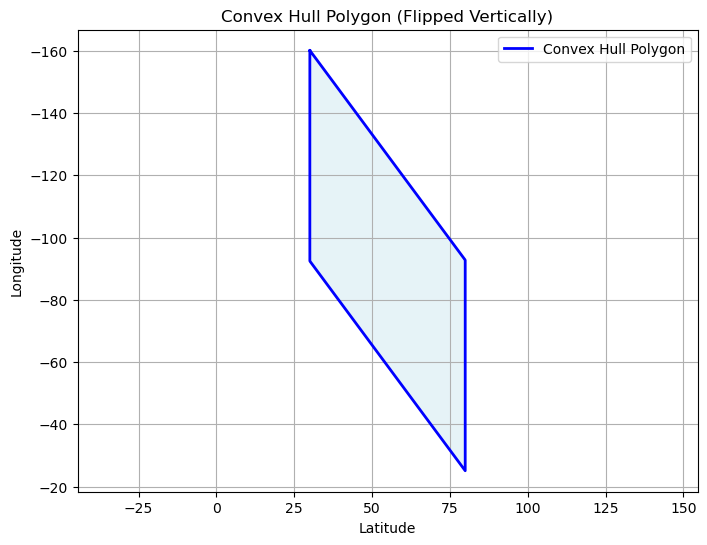

In [6]:
import matplotlib.pyplot as plt

# Unpack coords into x (lon) and y (lat)
x, y = zip(*coords)  # coords is a list of (lon, lat) tuples

# Plot the polygon (with x=lon, y=lat)
plt.figure(figsize=(8, 6))
plt.plot(y, x, color='blue', linewidth=2, label='Convex Hull Polygon')  # swapped y, x
plt.fill(y, x, color='lightblue', alpha=0.3)  # optional fill

# Formatting
plt.xlabel("Latitude")   # because y is now lat
plt.ylabel("Longitude")  # because x is now lon
plt.title("Convex Hull Polygon (Flipped Vertically)")
plt.grid(True)
plt.legend()
plt.axis("equal")
plt.gca().invert_yaxis()  # ⬅️ Flip vertically
plt.show()